# Expanding confusion

- supervised by Prof. Cheng Zhao

## References:

1. Davis & Lineweaver: *Expanding Confusion: common misconceptions of cosmological horizons and the superluminal expansion of the Universe*, 2003, https://arxiv.org/abs/astro-ph/0310808v2

In [44]:
import numpy as np
from matplotlib import pyplot as plt

In [45]:
from scipy import integrate

In [46]:
from scipy.interpolate import interp1d

## from time to scale factor

use $a E(a)$

the equation $dt/da$, a0 is set to 1.

In [47]:
def dt_over_da(a, H0, a0, OmR, OmM, OmL, OmK):
    sq = H0 * a0 * np.sqrt(OmR /a**(2) + OmM / a + OmL *a**2 + OmK)
    return 1/sq

In [48]:
a1_l = np.arange(0.001, 10, 0.01)
t_l = []

units:

In [49]:
Mpc_over_km = 3.08567758 * 10**19
Myr_over_s = 365.25*24*3600 * 10**6

H0 in unit /Myr

In [50]:
H0, a0, OmR, OmM, OmL, OmK = 70/Mpc_over_km*Myr_over_s, 1, 0, 0.3, 0.7, 0

In [51]:
for a1 in a1_l:
    t = integrate.quad(lambda a: dt_over_da(a, H0, a0, OmR, OmM, OmL, OmK), 0, a1)
    t_l.append(t[0])    

In [52]:
a2t = interp1d(a1_l, t_l)
t0 = a2t(a0)

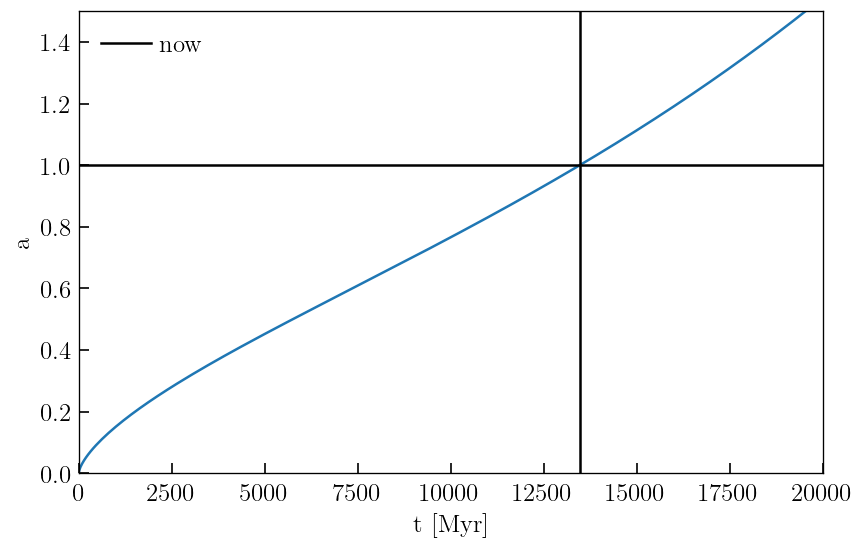

In [91]:
plt.plot(t_l, a1_l)
plt.axhline(y=a0, color='black', label='now')
plt.axvline(x=t0, color='black')
plt.xlim(0, 20000)
plt.ylim(0, 1.5)
plt.xlabel("t [Myr]")
plt.ylabel("a")
plt.legend()

### z(t)

In [54]:
def a2z(a, a0=1):
    return a0 / a - 1 

In [55]:
z1_l = a2z(a1_l)

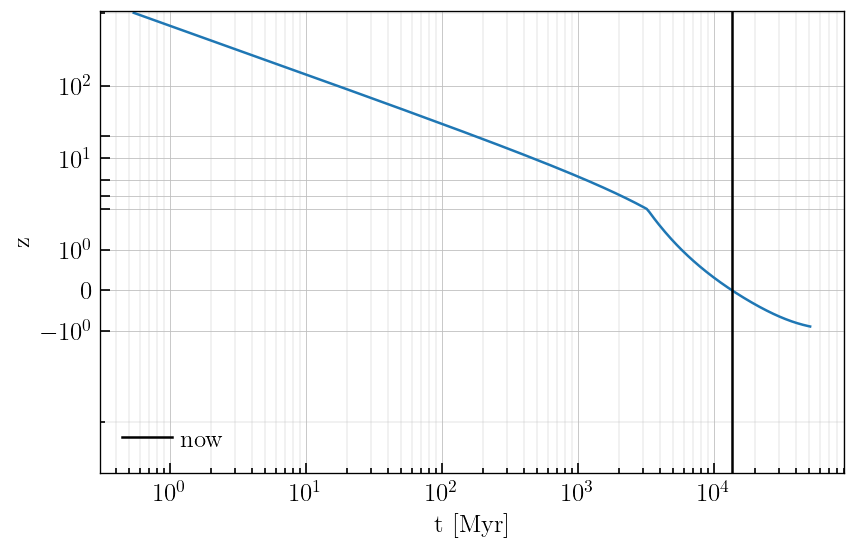

In [56]:
plt.plot(t_l, z1_l)
plt.axvline(x=t0, color='black', label='now')
plt.grid( which="major", linewidth=0.5, color="0.75" )
plt.grid( which="minor", linewidth=0.25, color="0.75" )
plt.ylabel("z")
plt.yscale('symlog')
y_ticks = np.array([-1, 0, 1, 2, 3, 5, 10, 20, 100])
plt.yticks(y_ticks)
plt.xlabel("t [Myr]")
plt.xscale("log")
plt.legend()

## Hubble parameter

$$E(a) = \sqrt{ \Omega_R \left(\frac{a}{a_0}\right)^{-4} + \Omega_M \left(\frac{a}{a_0}\right)^{-3} + \Omega_\Lambda + \Omega_K \left(\frac{a}{a_0}\right)^{-2} }$$

In [57]:
def Ha(a, H0, a0, OmR, OmM, OmL, OmK):
    'give me H0 in /Myr (/s), return Ha in /Myr (/s)'
    Ea = np.sqrt(OmR /a**4 + OmM / a**3 + OmL + OmK / a**2)
    return H0 * Ea

In [58]:
def dtau_over_da(a, H0, a0, OmR, OmM, OmL, OmK):
    'give me H0 in /Myr, return tau in Myr'
    sq = a*a * Ha(a, H0, a0, OmR, OmM, OmL, OmK)
    return 1/sq

## Conformal Time

In [59]:
ai = 0

In [60]:
tau_l = []
for a1 in a1_l:
    tau = integrate.quad(lambda a: dtau_over_da(a, H0, a0, OmR, OmM, OmL, OmK), ai, a1)
    tau_l.append(tau[0])

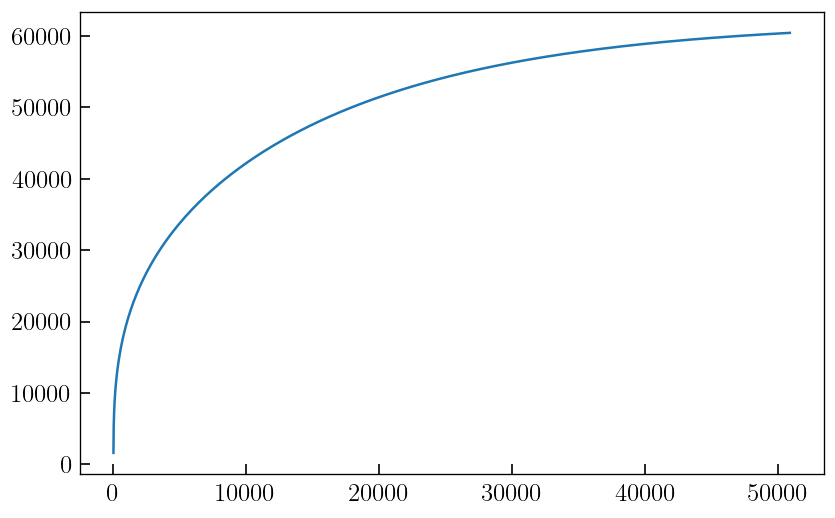

In [61]:
plt.plot(t_l, tau_l)

In [62]:
a2tau = interp1d(a1_l, tau_l)
tau0 = a2tau(a0)

## Distance

In [63]:
H0 = 70 #km/s/Mpc

In [64]:
c = 3e5 #km/s

In [65]:
def dchi_over_da(a, H0, a0, OmR, OmM, OmL, OmK):
    'give me H0 in km/s/Mpc, return chi_lc in Mpc, as c is in km/s'
    return c * dtau_over_da(a, H0, a0, OmR, OmM, OmL, OmK)

### Hubble sphere

In [66]:
chi_H = c/(a1_l * Ha(a1_l, H0, a0, OmR, OmM, OmL, OmK)) #Mpc

### $\chi(z)$

In [67]:
chi_l = []
for a1 in a1_l:
    chi = integrate.quad(lambda a: dchi_over_da(a, H0, a0, OmR, OmM, OmL, OmK), a1, a0)
    chi_l.append(chi[0])

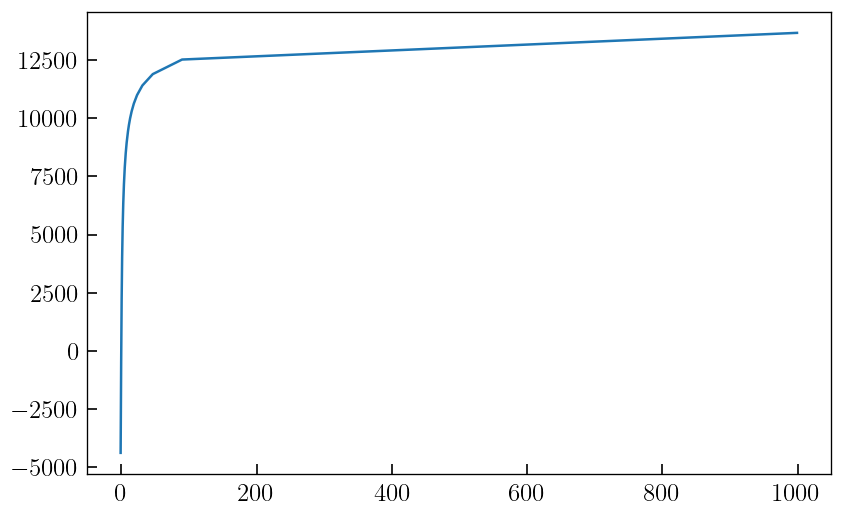

In [68]:
plt.plot(z1_l, chi_l)
# plt.xscale('symlog')
# plt.yscale('symlog')

### Light Cone

In [69]:
lc_l = []
for a1 in a1_l:
    lc = integrate.quad(lambda a: dchi_over_da(a, H0, a0, OmR, OmM, OmL, OmK), a1, a0)
    lc_l.append(lc[0])

### Event Horizon

python can not deal with $\infty$, so we use $999$ to present $\infty$, since $999 \ll 1$.

In [83]:
eh_l = []
for a1 in a1_l:
    eh = integrate.quad(lambda a: dchi_over_da(a, H0, a0, OmR, OmM, OmL, OmK), a1, 999)
    eh_l.append(eh[0])

### Particle Horizon

In [70]:
ph_l = []
for a1 in a1_l:
    ph = integrate.quad(lambda a: dchi_over_da(a, H0, a0, OmR, OmM, OmL, OmK), 0, a1)
    ph_l.append(ph[0])

#### optical horizon

In [71]:
z_r = 1100
a_r = a0/(1+z_r)

In [72]:
oh_l = []
for a1 in a1_l:
    oh = integrate.quad(lambda a: dchi_over_da(a, H0, a0, OmR, OmM, OmL, OmK), a_r, a1)
    oh_l.append(oh[0])

In [73]:
ph_l = np.array(ph_l)
oh_l = np.array(oh_l)
fe = ph_l/oh_l -1

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


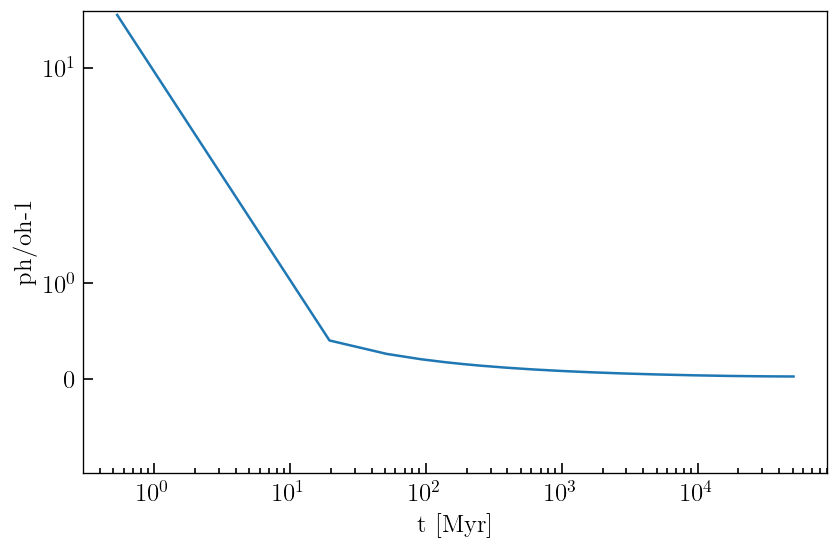

In [74]:
plt.plot(t_l, fe)
plt.xscale('log')
plt.yscale('symlog')
plt.xlabel("t [Myr]")
plt.ylabel("ph/oh-1")
plt.legend()

## plot

In [75]:
chi2z = interp1d(chi_l, z1_l)
z2chi = interp1d(z1_l, chi_l)

In [76]:
max(chi_l)

13669.739034153941

In [86]:
def plots(mode='t'):
    fig, ax = plt.subplots()
    if mode=='t':
        time = t_l
        time0 = t0
        ylabel = "t [Myr]"
        ax.set_ylim(0, 26000)
    elif mode=='tau':
        time = tau_l
        time0 = tau0
        ylabel = "$\tau$ [Myr]"
    ax.plot(chi_H, time, label="Hubble sphere")
    ax.plot(lc_l, time, label="light cone")
    ax.plot(ph_l, time, label="particle horizon", linestyle="dashed")
    ax.plot(eh_l, time, label="`event horizon' to a=999", linestyle="dashed")
    ax.axhline(y=time0, color='black', label='now')
    # ax.axvline(x=0, color='black', linestyle='-.')
    ax.set_xlim(0, max(chi_l))
    ax.set_xlabel("Comoving Spacial Coordiante (Comoving Distance) $\chi$ [Mpc]")
    secax = ax.secondary_xaxis('top', functions=(chi2z, z2chi))
    secax.set_ticks([0, 1, 2, 3, 5, 10, 20, 30, 50])
    secax.set_xlabel(r"$z$")
    ax.set_ylabel(ylabel)
    ax.legend()

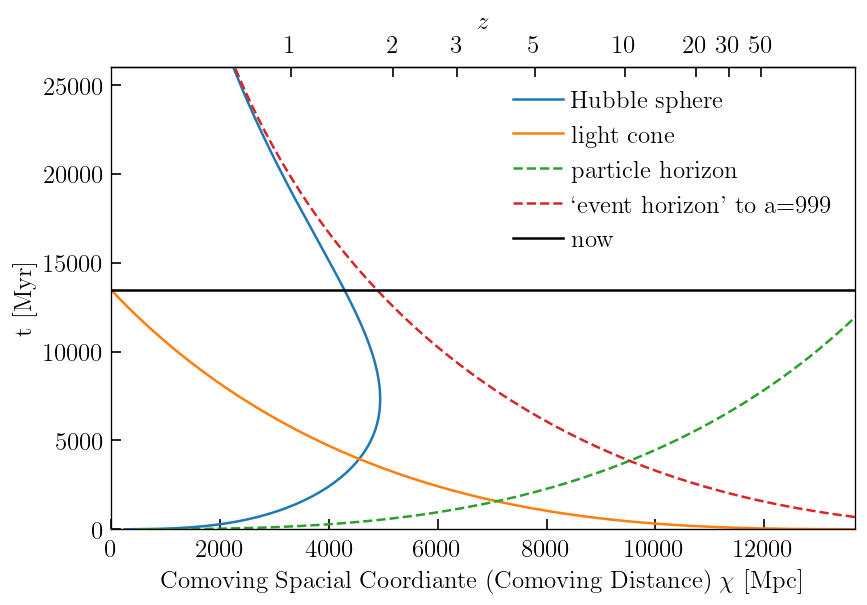

In [87]:
plots()

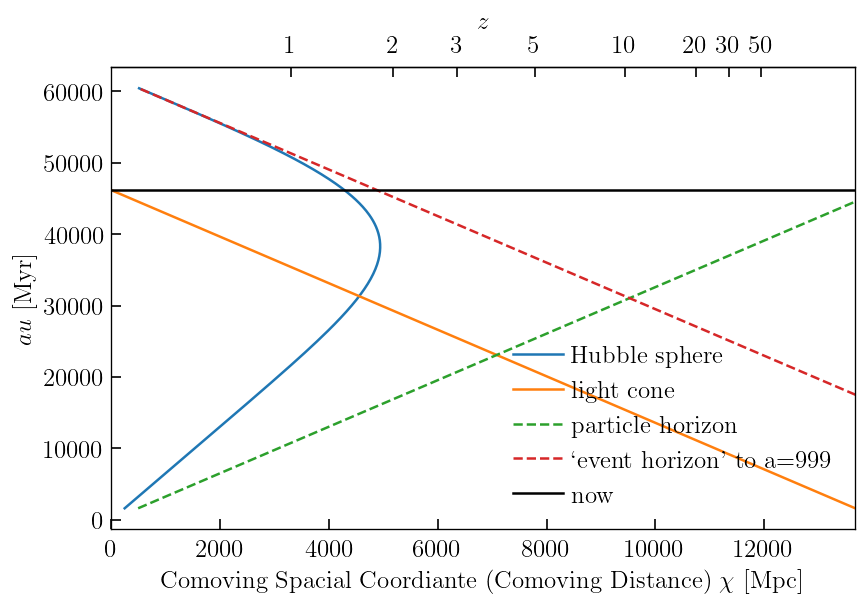

In [88]:
plots(mode='tau')